In [1]:
import os
import sys
import pandas as pd
sys.path.append('../Scripts')
from Financial_Data_EDA import FinancialDataEDA

In [2]:
import pandas as pd

# Function to rename columns and clean the dataframe
def rename_columns(df):
    """Renames the columns to ensure they are consistent across all datasets."""
    
    # Print column names to check what's being read
    print(f"Columns before renaming:", df.columns)
    
    # Check the number of columns to understand the mismatch
    if len(df.columns) == 7:
        df.columns = ['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low', 'Open']
    elif len(df.columns) == 6:
        # In case there are 6 columns, possibly no 'Adj Close' or 'Volume' column, adjust accordingly
        df.columns = ['Date', 'Price', 'Close', 'High', 'Low', 'Open']
    else:
        raise ValueError(f"Unexpected number of columns: {len(df.columns)}")
    
    # Drop any rows that have 'Date' or 'Ticker' in them (e.g., the first two rows)
    df = df[~df['Date'].isin(['Date', 'Ticker'])]
    
    # Convert 'Date' column to datetime using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
    
    # Set 'Date' column as index
    df.set_index('Date', inplace=True)
    
    return df

# List of tickers and file names
tickers = ['BND', 'SPY', 'TSLA']  # Example tickers
data = {}

# Load and rename columns for each ticker's data
for ticker in tickers:
    # Load each CSV file based on ticker name from the ../Data folder
    df = pd.read_csv(f'../Data/{ticker}_historical_data.csv')  # Using the correct path
    
    # Apply the rename_columns function to clean up column names
    df = rename_columns(df)
    df.index = pd.to_datetime(df.index, errors='coerce')
    df.columns = ['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low']
    # Add to dictionary with ticker as the key
    data[ticker] = df

# Instantiate the FinancialDataEDA class with the dictionary of DataFrames
eda = FinancialDataEDA(data)


Columns before renaming: Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Columns before renaming: Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Columns before renaming: Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Columns before renaming for BND: Index(['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low'], dtype='object')
Columns before renaming for SPY: Index(['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low'], dtype='object')
Columns before renaming for TSLA: Index(['Date', 'Price', 'Adj Close', 'Close', 'High', 'Low'], dtype='object')
Handling missing values for BND...
Missing values in BND:
Series([], dtype: int64)
Handling missing values for SPY...
Missing values in SPY:
Series([], dtype: int64)
Handling missing values for TSLA...
Missing values in TSLA:
Series([], dtype: int64)


d:\10 ACADAMY KIFIYA\Week 11\gfm-investments-portfolio-management\env\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
d:\10 ACADAMY KIFIYA\Week 11\gfm-investments-portfolio-management\env\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
d:\10 ACADAMY KIFIYA\Week 11\gfm-investments-portfolio-management\env\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index

In [3]:
eda.check_basic_statistics()
#eda.ensure_data_types_and_missing_values()

Basic statistics for BND:
              Date        Price    Adj Close        Close         High  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     70.090355    80.313103    80.428214    80.195487    80.316990   
std       4.889239     5.098654     5.083342     5.114344     5.101539   
min      62.637550    68.040001    68.379997    67.989998    68.080002   
25%      66.316067    76.359997    76.660000    76.250000    76.485001   
50%      68.890190    81.410004    81.519997    81.300003    81.410004   
75%      73.806076    84.010002    84.165001    83.935001    84.045002   
max      79.812912    89.480003    89.589996    89.440002    89.550003   

                Low  
count  2.475000e+03  
mean   4.169801e+06  
std    2.778103e+06  
min    0.000000e+00  
25%    2.025100e+06  
50%    3.711400e+06  
75%    5.524950e+06  
max    3.193720e+07  
Basic statistics for SPY:
              Date        Price    Adj Close        Close         High  \
count  24

Closing price plot saved as 'closing_price_plot.png' in ../Images/


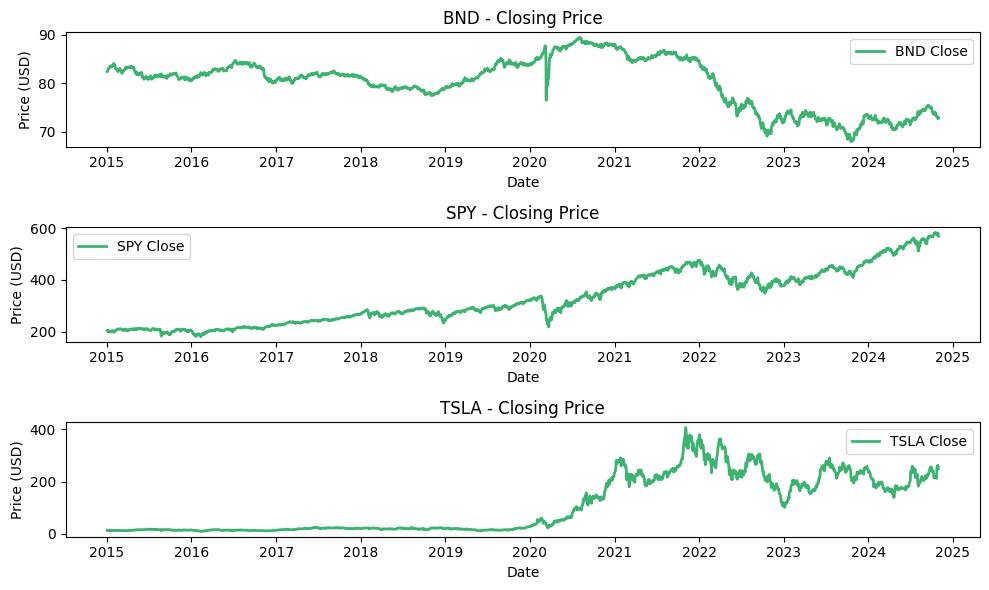

In [4]:
# Plot closing prices for all tickers
eda.plot_closing_price()


Daily percentage change for BND:
                                Date  Daily Return
Date                                              
2015-01-05 00:00:00+00:00  63.542732      0.003397
2015-01-06 00:00:00+00:00  63.726700      0.003990
2015-01-07 00:00:00+00:00  63.765041      0.000241
2015-01-08 00:00:00+00:00  63.665398     -0.000963
2015-01-09 00:00:00+00:00  63.772682      0.000362
...                              ...           ...
2024-10-25 00:00:00+00:00  72.931664     -0.000547
2024-10-28 00:00:00+00:00  72.841942     -0.002461
2024-10-29 00:00:00+00:00  72.901749     -0.002193
2024-10-30 00:00:00+00:00  72.831970      0.003160
2024-10-31 00:00:00+00:00  72.822006     -0.002602

[2474 rows x 2 columns]


Daily percentage change for SPY:
                                 Date  Daily Return
Date                                               
2015-01-05 00:00:00+00:00  170.046249     -0.013860
2015-01-06 00:00:00+00:00  168.444611     -0.012367
2015-01-07 00:00:00+00:00  170.54368

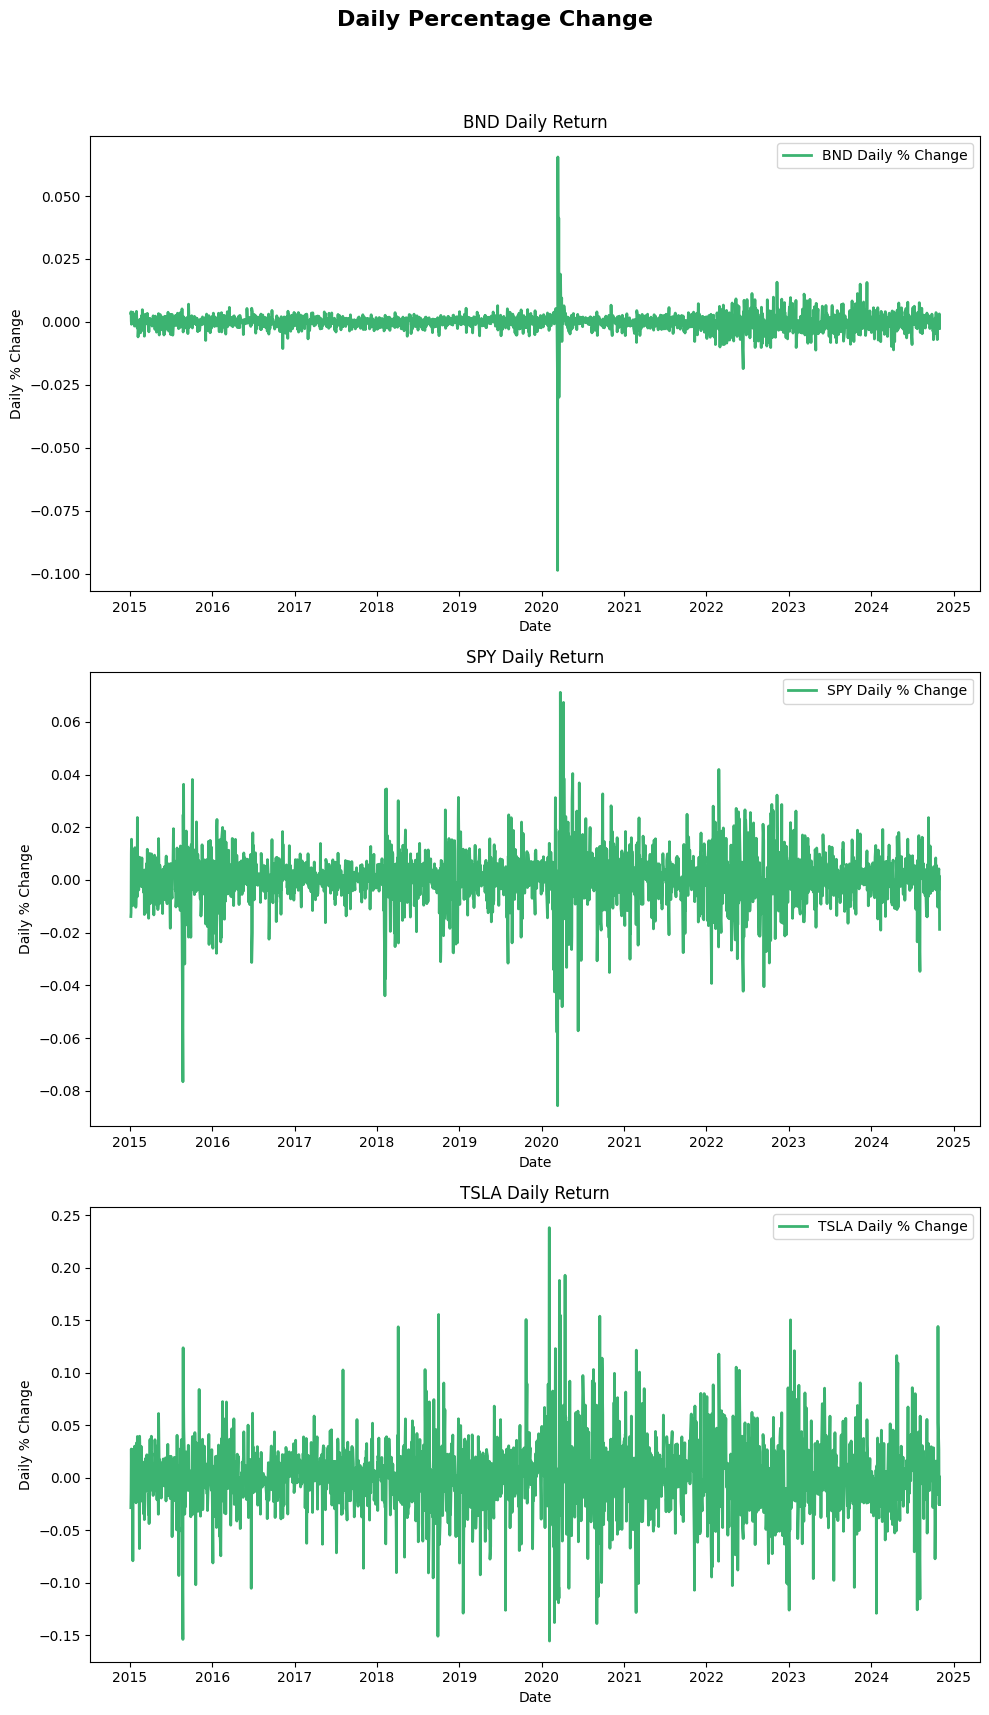

In [5]:
# Plot daily percentage changes for all tickers
eda.plot_daily_pct_change()



BND - 30-Day Rolling Mean and Standard Deviation:
                           Rolling Mean  Rolling Std
Date                                                
2024-10-25 00:00:00+00:00     -0.000997     0.002607
2024-10-28 00:00:00+00:00     -0.001115     0.002590
2024-10-29 00:00:00+00:00     -0.001215     0.002572
2024-10-30 00:00:00+00:00     -0.001021     0.002676
2024-10-31 00:00:00+00:00     -0.001050     0.002689

SPY - 30-Day Rolling Mean and Standard Deviation:
                           Rolling Mean  Rolling Std
Date                                                
2024-10-25 00:00:00+00:00      0.001102     0.004483
2024-10-28 00:00:00+00:00      0.001216     0.004518
2024-10-29 00:00:00+00:00      0.001043     0.004602
2024-10-30 00:00:00+00:00      0.001090     0.004599
2024-10-31 00:00:00+00:00      0.000035     0.005358

TSLA - 30-Day Rolling Mean and Standard Deviation:
                           Rolling Mean  Rolling Std
Date                                               

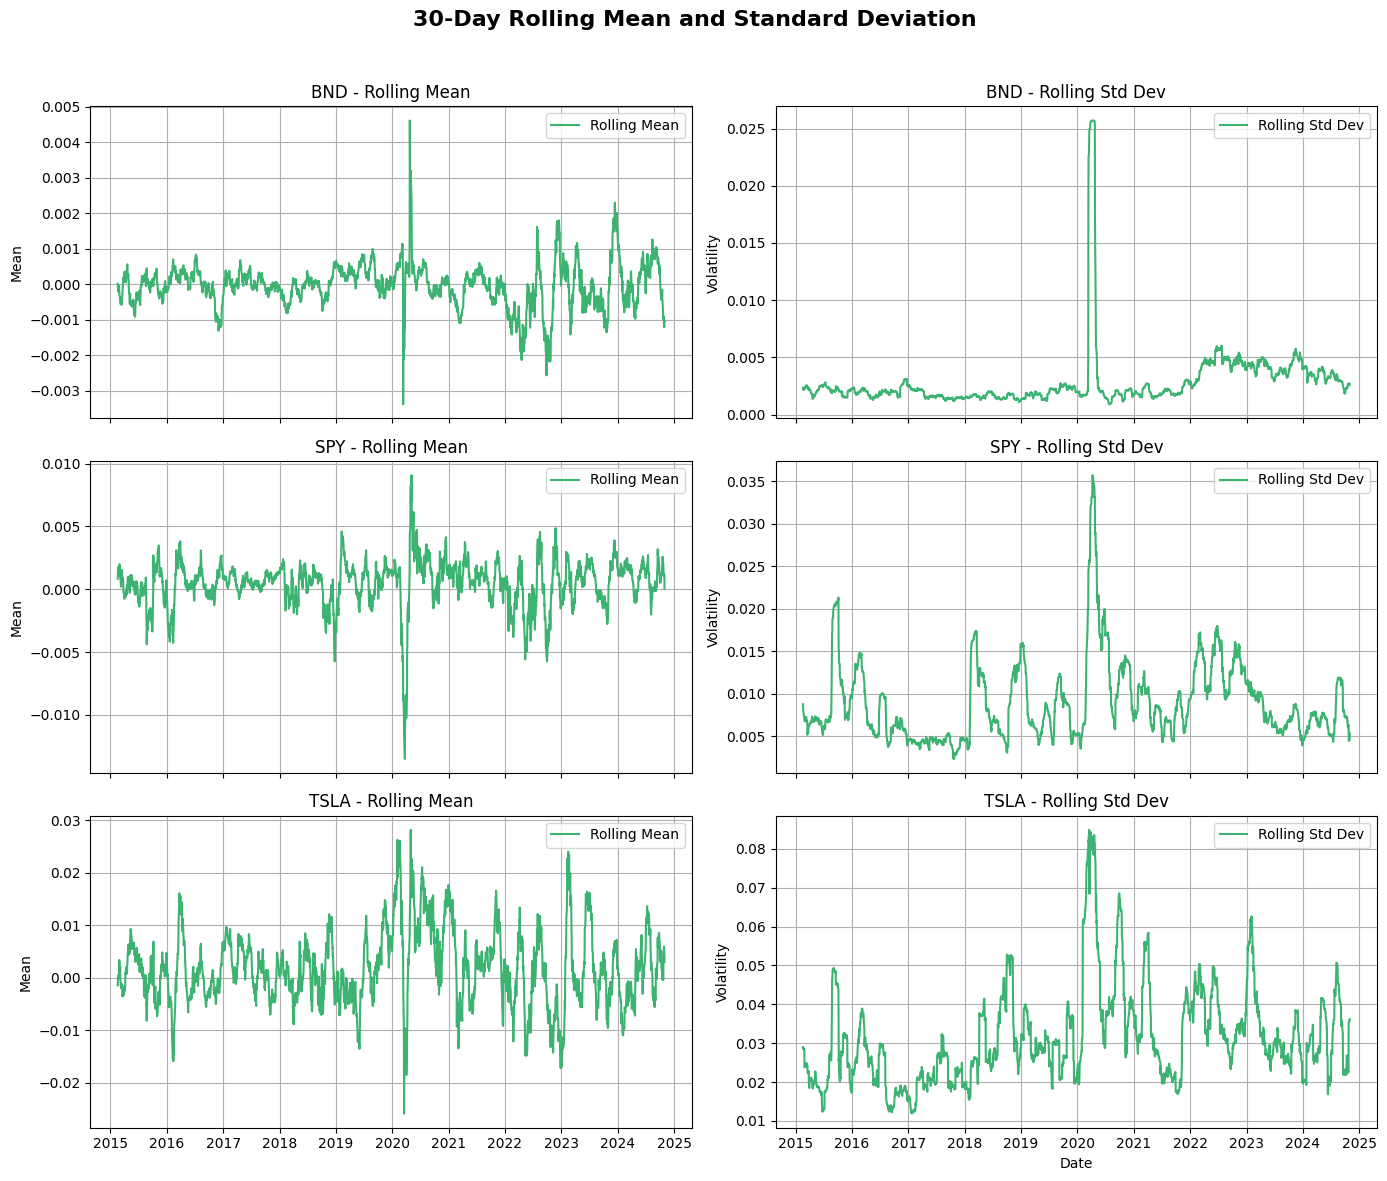

In [6]:
# Analyze volatility (e.g., with a 30-day rolling window)
eda.analyze_volatility(window=30)


Outliers for BND:
                               Close  Daily Return
Date                                              
2016-11-09 00:00:00+00:00  82.019997     -0.010615
2020-03-10 00:00:00+00:00  86.589996     -0.012882
2020-03-11 00:00:00+00:00  84.870003     -0.019864
2020-03-12 00:00:00+00:00  76.489998     -0.098739
2020-03-13 00:00:00+00:00  81.500000      0.065499
2020-03-16 00:00:00+00:00  79.510002     -0.024417
2020-03-17 00:00:00+00:00  82.790001      0.041253
2020-03-18 00:00:00+00:00  80.309998     -0.029955
2020-03-20 00:00:00+00:00  80.690002      0.013948
2020-03-24 00:00:00+00:00  82.739998      0.018966
2020-03-25 00:00:00+00:00  84.139999      0.016920
2020-03-26 00:00:00+00:00  85.040001      0.010696
2022-03-02 00:00:00+00:00  81.209999     -0.009996
2022-06-10 00:00:00+00:00  74.760002     -0.009932
2022-06-13 00:00:00+00:00  73.370003     -0.018593
2022-07-22 00:00:00+00:00  76.279999      0.011269
2022-08-05 00:00:00+00:00  75.860001     -0.010177
2022-09-01 00

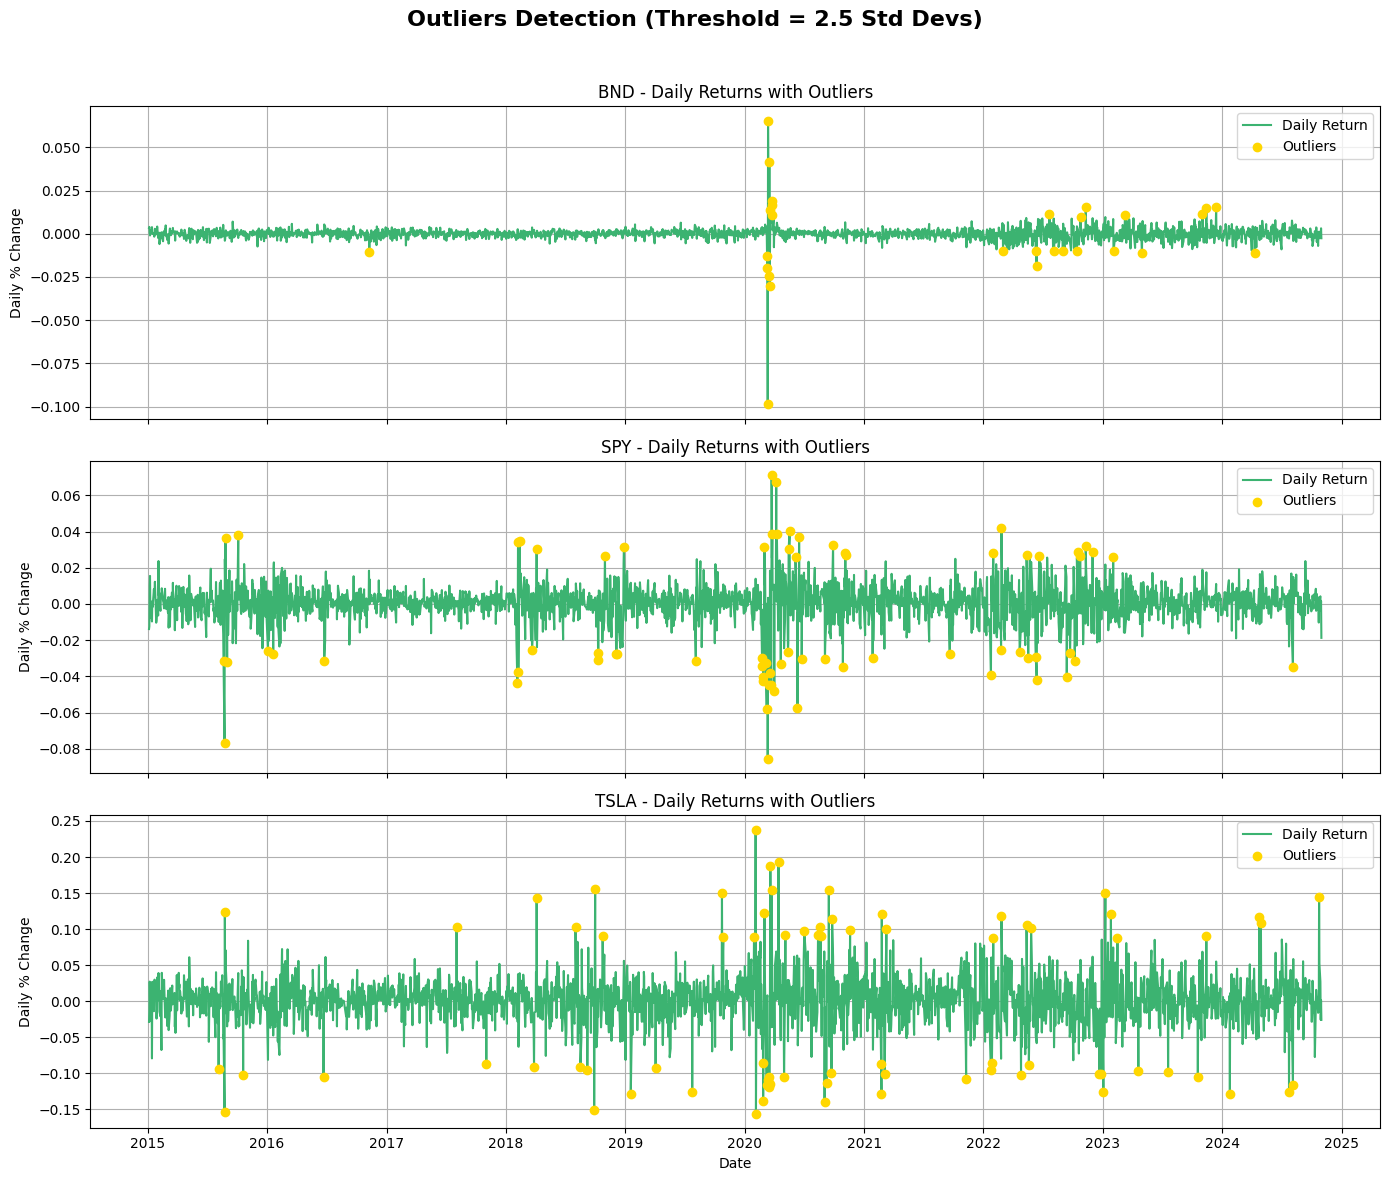

In [7]:
# Detect outliers in daily returns based on 2.5 standard deviations
eda.detect_outliers(threshold=2.5)


TSLA - Trend Component:
 count    2223.000000
mean      102.437014
std        97.438382
min        13.102016
25%        17.581759
50%        31.813280
75%       202.525238
max       300.309676
Name: trend, dtype: float64
TSLA - Seasonal Component:
 count    2475.000000
mean        1.000101
std         0.011914
min         0.966940
25%         0.992562
50%         1.000235
75%         1.006816
max         1.032969
Name: seasonal, dtype: float64
TSLA - Residual Component:
 count    2223.000000
mean        0.985694
std         0.063954
min         0.691578
25%         0.974306
50%         0.997743
75%         1.017746
max         1.137997
Name: resid, dtype: float64
Plot saved as ../Images\TSLA_time_series_decomposition.png


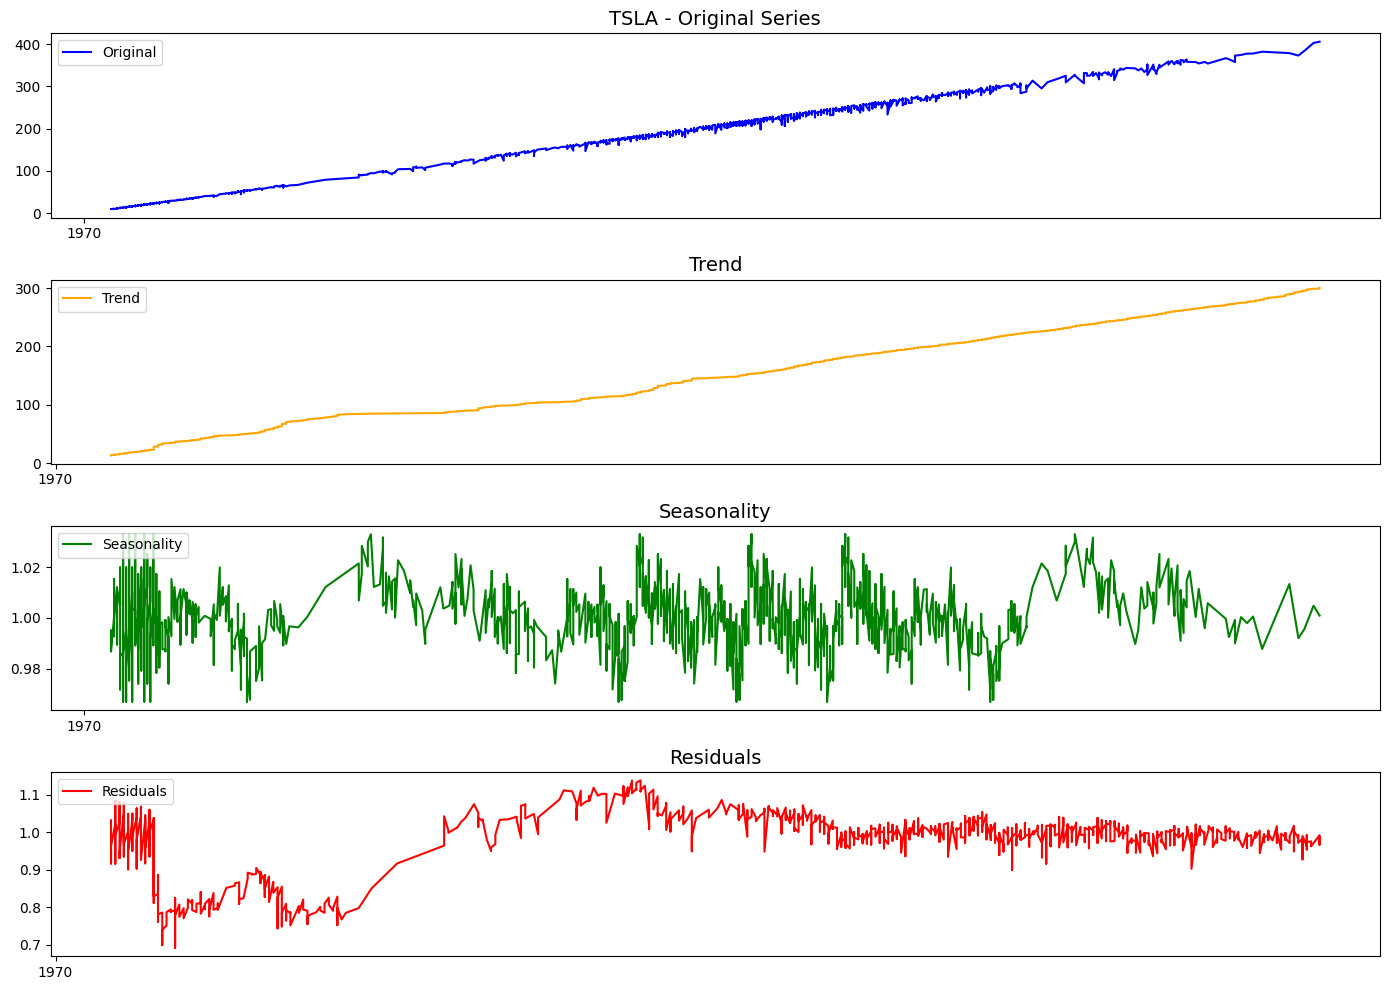

In [8]:
eda.decompose_time_series(ticker='TSLA')


SPY - Trend Component:
 count    2223.000000
mean      324.277235
std        89.659503
min       200.588572
25%       247.917688
50%       298.493115
75%       406.782818
max       517.879682
Name: trend, dtype: float64
SPY - Seasonal Component:
 count    2475.000000
mean        1.000012
std         0.005100
min         0.985045
25%         0.996449
50%         1.000532
75%         1.003467
max         1.013227
Name: seasonal, dtype: float64
SPY - Residual Component:
 count    2223.000000
mean        0.998838
std         0.013716
min         0.914843
25%         0.990209
50%         0.999387
75%         1.007889
max         1.033760
Name: resid, dtype: float64
Plot saved as ../Images\SPY_time_series_decomposition.png


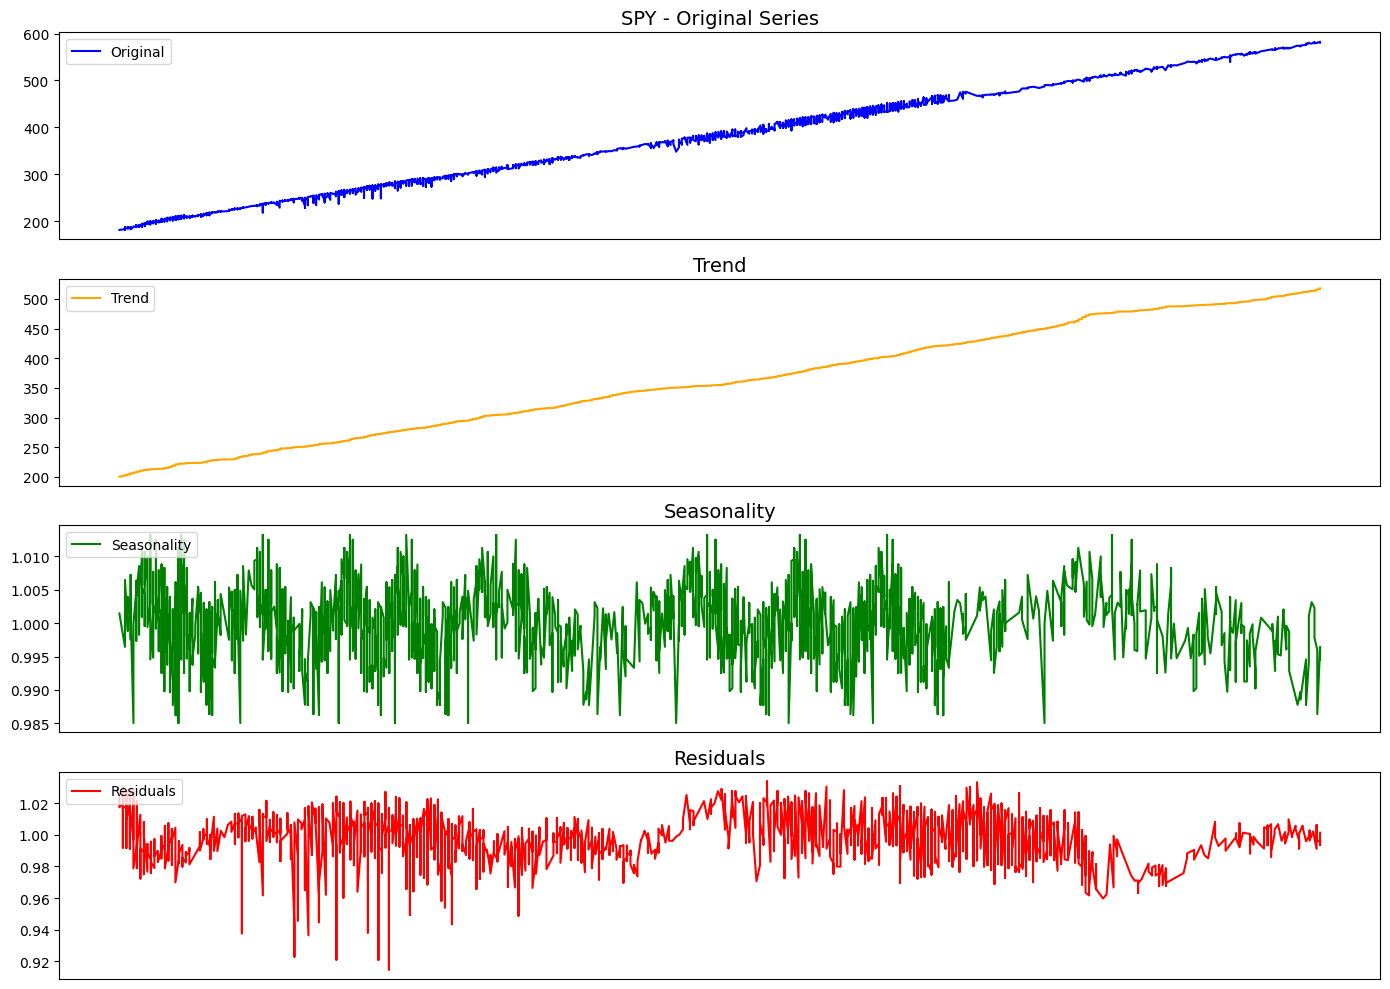

In [9]:
eda.decompose_time_series(ticker='SPY')


BND - Trend Component:
 count    2223.000000
mean       79.693930
std         3.442336
min        74.218194
25%        77.552183
50%        79.638353
75%        81.600099
max        87.291647
Name: trend, dtype: float64
BND - Seasonal Component:
 count    2475.000000
mean        1.000058
std         0.020485
min         0.954784
25%         0.986039
50%         1.003346
75%         1.013759
max         1.042531
Name: seasonal, dtype: float64
BND - Residual Component:
 count    2223.000000
mean        1.000108
std         0.041322
min         0.857454
25%         0.976561
50%         1.005087
75%         1.027353
max         1.136147
Name: resid, dtype: float64
Plot saved as ../Images\BND_time_series_decomposition.png


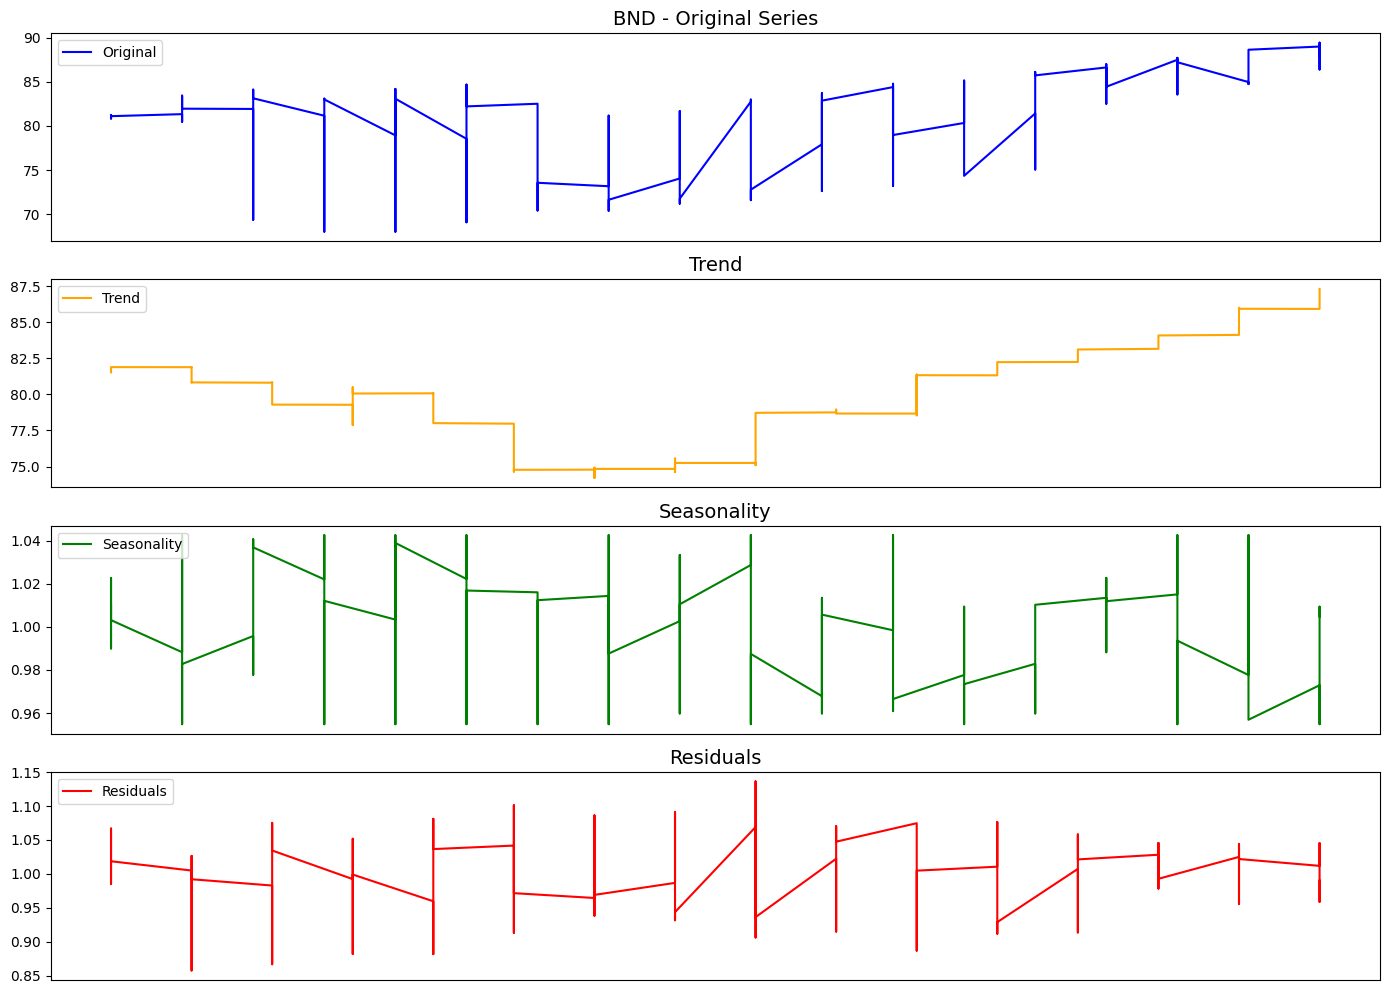

In [10]:
eda.decompose_time_series(ticker='BND')